# Medical insurance cost prediction

## Import necessary libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

import cufflinks as cf
import plotly.express as px
# Make Plotly work in your Jupyter Notebook
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
# Use Plotly locally
cf.go_offline()


## Load the data

In [4]:
insurance = pd.read_csv('insurance.csv')
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Exploratory data analysis

In [5]:
insurance.shape

(1338, 7)

In [6]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Categorical features:
- sex
- smoker
- region

c:\users\amitb\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



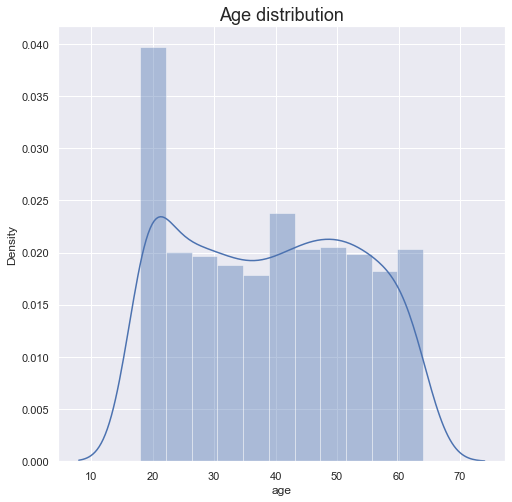

In [7]:
sns.set()
plt.figure(figsize=(8,8))
sns.distplot(insurance['age'],kde=True)
plt.title('Age distribution',fontsize=18)
plt.show()

c:\users\amitb\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



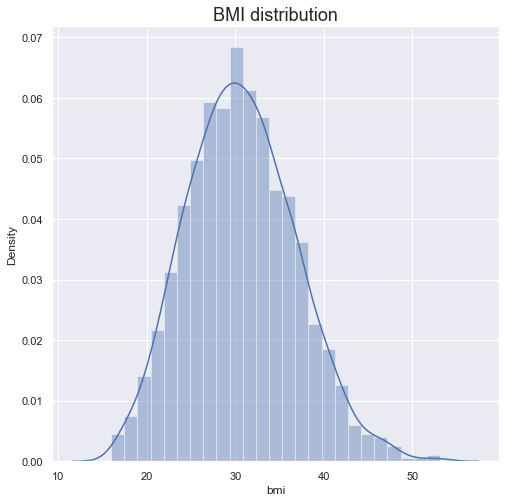

In [8]:
plt.figure(figsize=(8,8))
sns.distplot(insurance['bmi'],kde=True)
plt.title('BMI distribution',fontsize=18)
plt.show()

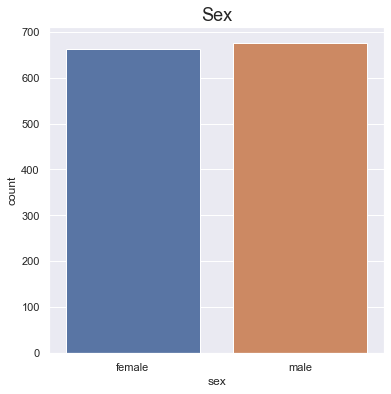

In [9]:
plt.figure(figsize=(6,6))
sns.countplot(x='sex',data=insurance)
plt.title('Sex',fontsize=18)
plt.show()

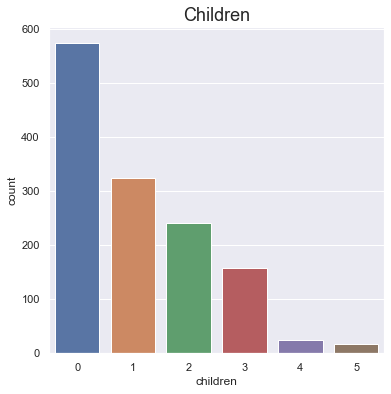

In [10]:
plt.figure(figsize=(6,6))
sns.countplot(x='children',data=insurance)
plt.title('Children',fontsize=18)
plt.show()

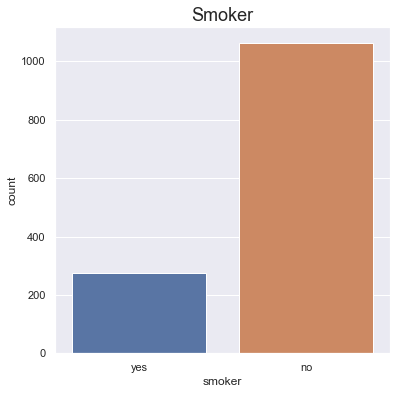

In [11]:
plt.figure(figsize=(6,6))
sns.countplot(x='smoker',data=insurance)
plt.title('Smoker',fontsize=18)
plt.show()

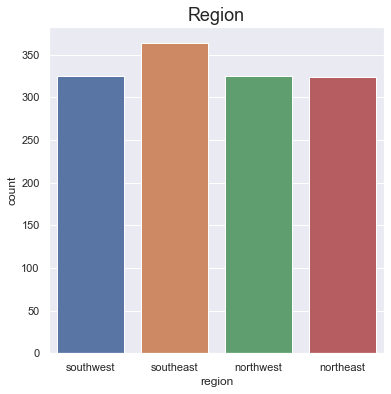

In [12]:
plt.figure(figsize=(6,6))
sns.countplot(x='region',data=insurance)
plt.title('Region',fontsize=18)
plt.show()

c:\users\amitb\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



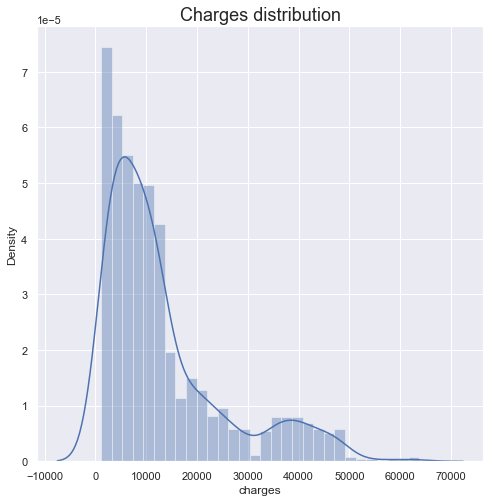

In [13]:
plt.figure(figsize=(8,8))
sns.distplot(insurance['charges'],kde=True)
plt.title('Charges distribution',fontsize=18)
plt.show()

In [16]:
plt.figure(figsize=(12,6))
fig = px.scatter_3d(insurance, x='age', y='bmi', z='charges', color='sex',
                   opacity=0.7, width=800, height=800)
fig

<Figure size 864x432 with 0 Axes>

## Data pre-processing

In [18]:
# encoding sex column
insurance.replace({'sex':{'male':0,'female':1}},inplace=True)
# encoding smoker column
insurance.replace({'smoker':{'yes':0,'no':1}},inplace=True)
# encoding region column
insurance.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}},inplace=True)
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520


## Train & Test split

In [19]:
X = insurance.drop(columns='charges',axis=1)
Y = insurance['charges']

In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)
reg = LinearRegression()
reg.fit(X_train,Y_train)

LinearRegression()

## Model evaluation

In [21]:
train_pred = reg.predict(X_train)
# R squared value
r2_train = metrics.r2_score(Y_train, train_pred)
print('Training data- R squared value : ', r2_train)

Training data- R squared value :  0.751505643411174


In [22]:
test_pred = reg.predict(X_test)
# R squared value
r2_test = metrics.r2_score(Y_test, test_pred)
print('Test data- R squared vale : ', r2_test)

Test data- R squared vale :  0.7447273869684077
